## **Install Pytorch dan Tensorflow**

In [1]:
!pip install tensorflow
!pip install torch torchvision

## **Import Library**

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.impute import SimpleImputer
from tensorflow.keras.callbacks import EarlyStopping

## **DATA EXPLORING**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/Infrared.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

,0
Gender,0
Age,0
Ethnicity,0
T_atm,0
Humidity,0
Distance,2
T_offset1,0
Max1R13_1,0
Max1L13_1,0
aveAllR13_1,0


In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1018 non-null   object 
 1   Age          1018 non-null   object 
 2   Ethnicity    1018 non-null   object 
 3   T_atm        1018 non-null   float64
 4   Humidity     1018 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1018 non-null   float64
 7   Max1R13_1    1018 non-null   float64
 8   Max1L13_1    1018 non-null   float64
 9   aveAllR13_1  1018 non-null   float64
 10  aveAllL13_1  1018 non-null   float64
 11  T_RC1        1018 non-null   float64
 12  T_RC_Dry1    1018 non-null   float64
 13  T_RC_Wet1    1018 non-null   float64
 14  T_RC_Max1    1018 non-null   float64
 15  T_LC1        1018 non-null   float64
 16  T_LC_Dry1    1018 non-null   float64
 17  T_LC_Wet1    1018 non-null   float64
 18  T_LC_Max1    1018 non-null   float64
 19  RCC1       

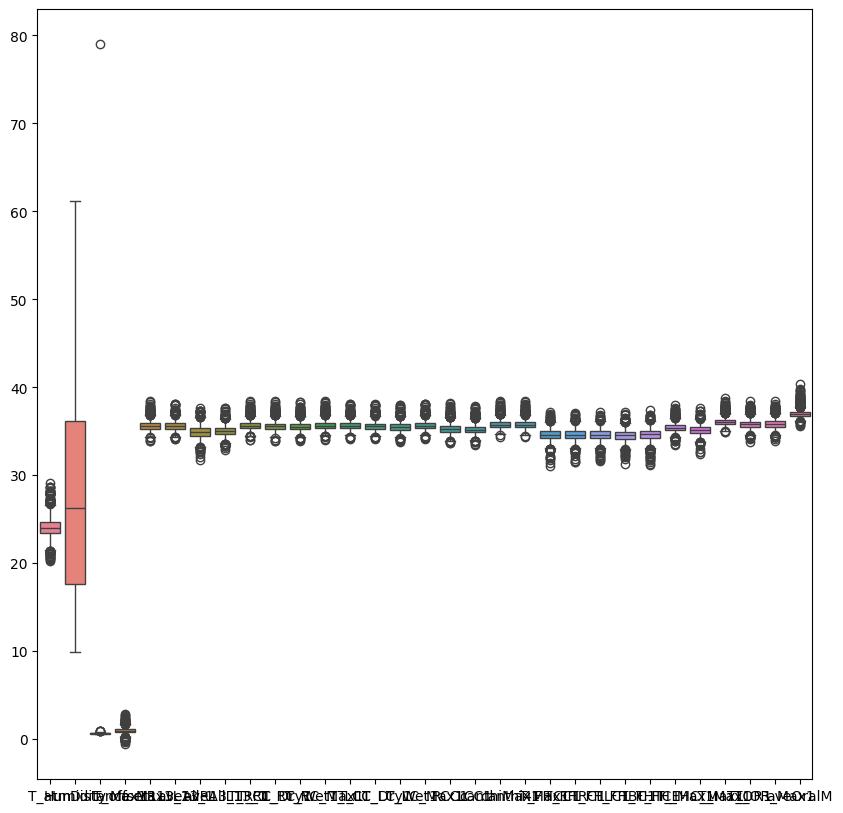

In [11]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df)
plt.show()

## **Data Preparation**

In [12]:
X = df.select_dtypes(include=np.number).drop('aveOralM', axis=1)
y = df['aveOralM']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
y_scaler = StandardScaler()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

In [16]:
X_train.shape

(814, 30)

In [17]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

In [18]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(32, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

## **Tensorflow Model**

In [19]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [20]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.compile(
    optimizer = 'adam',
    loss='mse'
)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split= 0.15, callbacks=[early_stopping])

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.3209 - val_loss: 0.6114
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4632 - val_loss: 0.3802
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3214 - val_loss: 0.3427
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2907 - val_loss: 0.3220
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2702 - val_loss: 0.3121
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2694 - val_loss: 0.2941
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2552 - val_loss: 0.2898
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2638 - val_loss: 0.2889
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2843 - val_loss: 0.2873
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2207 - val_loss: 0.2903
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2348 - val_loss: 0.2826
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - l

**Result**

In [21]:
y_test.min(), y_test.max()

(-1.593408074176033, 4.034672838553087)

In [22]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, model.predict(X_test))
mse = mean_squared_error(y_test, y_pred)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [23]:
print('============Hasil RMSE Tensorflow==========')
print(rmse)
print('============Hasil R2 Tensorflow============')
print(r2)
print('============Hasil MSE Tensorflow==========')
print(mse)

============Hasil RMSE Tensorflow==========
0.49227692757595765
============Hasil R2 Tensorflow============
0.665296345336384
============Hasil MSE Tensorflow==========
0.24233657342362463


## **Pytorch Model**

In [24]:
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

In [25]:
class SimpleNN(nn.Module):
    def __init__(self,input):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [26]:
model = SimpleNN(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [27]:
for epoch in range(100):
    # Training phase
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_torch)
        val_loss = criterion(val_outputs, y_test_torch)

    # Cetak loss setiap 10 epoch
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

print("PyTorch model training complete!")

Epoch 0, Training Loss: 0.9853056073188782, Validation Loss: 0.6505109071731567
Epoch 10, Training Loss: 0.4492194950580597, Validation Loss: 0.327452689409256
Epoch 20, Training Loss: 0.33460474014282227, Validation Loss: 0.2977595925331116
Epoch 30, Training Loss: 0.3042340874671936, Validation Loss: 0.28651854395866394
Epoch 40, Training Loss: 0.27275550365448, Validation Loss: 0.24973061680793762
Epoch 50, Training Loss: 0.25571954250335693, Validation Loss: 0.23749983310699463
Epoch 60, Training Loss: 0.24207380414009094, Validation Loss: 0.23393455147743225
Epoch 70, Training Loss: 0.23142410814762115, Validation Loss: 0.23272894322872162
Epoch 80, Training Loss: 0.22218628227710724, Validation Loss: 0.2279030829668045
Epoch 90, Training Loss: 0.21454451978206635, Validation Loss: 0.22455298900604248
PyTorch model training complete!


**Result**

In [28]:
y_test_torch.min(), y_test_torch.max()

(tensor(-1.5934), tensor(4.0347))

In [29]:
rmse = np.sqrt(mean_squared_error(y_test_torch, model(X_test_torch).detach().numpy()))
r2 = r2_score(y_test, model(X_test_torch).detach().numpy())
mse = mean_squared_error(y_test_torch, model(X_test_torch).detach().numpy())

In [30]:
print('============Hasil RMSE Pytorch==========')
print(rmse)
print('============Hasil R2 Pytorch==========')
print(r2)
print('============Hasil MSE Pytorch==========')
print(mse)

============Hasil RMSE Pytorch==========
0.47371616220034796
============Hasil R2 Pytorch==========
0.6900598078040339
============Hasil MSE Pytorch==========
0.22440700232982635


## **Persamaan Matematika Digunakan**

### **1. MSE**

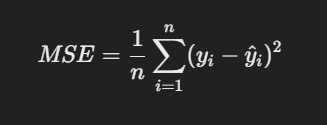

MSE digunakan untuk mengukur rata-rata kesalahan kuadrat antara nilai aktual (
𝑦
𝑖
 ) dan nilai prediksi (
𝑦
^
𝑖
 )


yi = nilai aktual

𝑦
^
i
​
  = nilai prediksi

𝑛
= jumlah sampel

MSE menghitung rata-rata dari selisih antara nilai aktual dan prediksi yang dikuadratkan.
Semakin kecil MSE, semakin baik model dalam memprediksi data.


### **2. RMSE**

RMSE adalah akar kuadrat dari MSE, yang mengubah skala kesalahan kembali ke satuan aslinya.

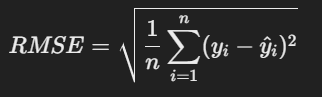

**n** adalah jumlah sampel dalam data

**y_i** adalah nilai aktual

**ŷ_i** adalah nilai prediksi

*   RMSE menghitung rata-rata dari selisih kuadrat antara nilai prediksi dan nilai aktual kemudian diambil akar kuadratnya
*   Semakin kecil nilai RMSE, semakin baik kualitas model tersebut.

### **3. R^2 (R-Squared)**

R ^2 mengukur seberapa baik model menjelaskan variasi dalam data.

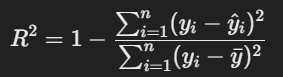

*   y
ˉ
​
  adalah rata-rata dari nilai aktual.
* Penyebut menunjukkan total variasi dalam data.
*   Pembilang menunjukkan kesalahan prediksi.
*  Jika
𝑅
2
=
1
, model sempurna. Jika mendekati 0 atau negatif, model buruk.